# Analysis of Twitter Data

First, I will import the `pandas` library to make processing the data easier.

In [30]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv("twitter_output_clean.csv")

In [32]:
df.head()

,id,account_type,followers_count,screen_name,verified,account_age,average_tweets_per_day,average_tweets_liked_per_day
0,787405734442958848,bot,1995.0,best_in_dumbest,False,2200,7.822273,0.002273
1,796216118331310080,human,781.0,CJRubinPhoto,False,2175,0.115402,0.207356
2,875949740503859204,human,261.0,SVGEGENT,False,1955,0.766752,3.798465
3,756119643622735875,human,751.0,TinkTinkEDU,False,2286,1.107174,8.336833
4,464781334,human,736975.0,JoleonLescott,True,3935,1.207116,0.156544


,id,account_type,followers_count,screen_name,verified,account_age,average_tweets_per_day,average_tweets_liked_per_day
0,787405734442958848,bot,1995.0,best_in_dumbest,False,2200,7.822273,0.002273
1,796216118331310080,human,781.0,CJRubinPhoto,False,2175,0.115402,0.207356
2,875949740503859204,human,261.0,SVGEGENT,False,1955,0.766752,3.798465
3,756119643622735875,human,751.0,TinkTinkEDU,False,2286,1.107174,8.336833
4,464781334,human,736975.0,JoleonLescott,True,3935,1.207116,0.156544


## Deriving Insights from Data

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df.describe()

,id,followers_count,account_age,average_tweets_per_day,average_tweets_liked_per_day
count,3.565000e+04,3.565000e+04,35650.000000,35650.000000,35650.000000
mean,1.213182e+17,4.002011e+05,3829.088527,6.014620,4.417910
std,2.994941e+17,2.615363e+06,1013.933488,21.383755,13.413856
min,4.180000e+02,0.000000e+00,1279.000000,0.000000,0.000000
25%,9.645175e+07,3.500000e+01,3124.000000,0.388574,0.108547
50%,3.901787e+08,3.825000e+02,4029.000000,1.233973,0.553509
75%,2.432737e+09,1.059875e+04,4698.000000,4.761864,2.891546
max,1.120974e+18,1.335201e+08,5955.000000,1225.271446,577.861282


,id,followers_count,account_age,average_tweets_per_day,average_tweets_liked_per_day
count,3.565000e+04,3.565000e+04,35650.000000,35650.000000,35650.000000
mean,1.213182e+17,4.002011e+05,3829.088527,6.014620,4.417910
std,2.994941e+17,2.615363e+06,1013.933488,21.383755,13.413856
min,4.180000e+02,0.000000e+00,1279.000000,0.000000,0.000000
25%,9.645175e+07,3.500000e+01,3124.000000,0.388574,0.108547
50%,3.901787e+08,3.825000e+02,4029.000000,1.233973,0.553509
75%,2.432737e+09,1.059875e+04,4698.000000,4.761864,2.891546
max,1.120974e+18,1.335201e+08,5955.000000,1225.271446,577.861282


### Account Types

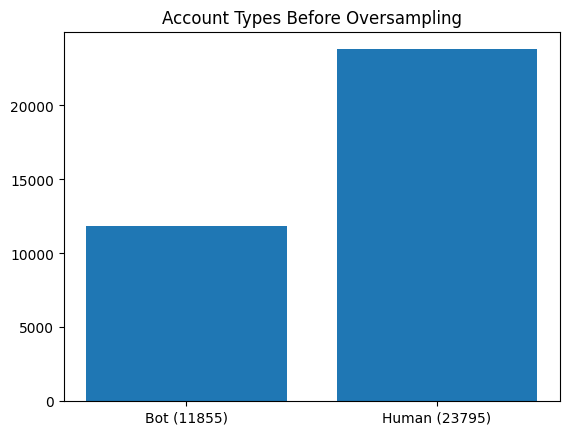

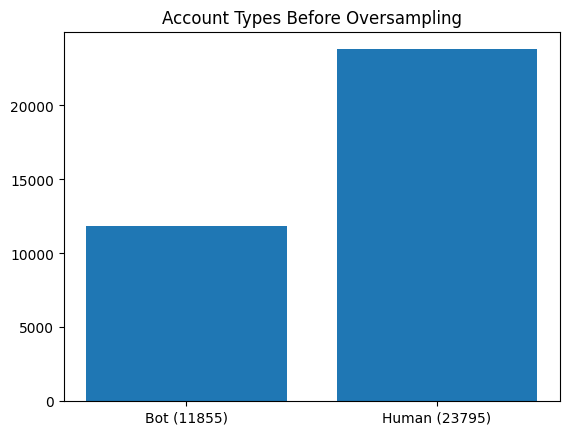

In [35]:
all_count = len(df)
bot_count = len(df[df["account_type"] == "bot"])

plt.bar(
    ["Bot (" + str(bot_count) + ')', "Human (" + str(all_count - bot_count) + ')'],
    [bot_count, all_count - bot_count]
)
plt.title("Account Types Before Oversampling")
plt.show()

The bar chart shows that there are more than twice as many human accounts as there are bot accounts. The model may be biased towards classifying accounts as human, so the bot class needs to be oversampled better to understand the behavior of bots and humans.

In [36]:
df = pd.concat([df, df[df["account_type"] == "bot"]], axis = 0)

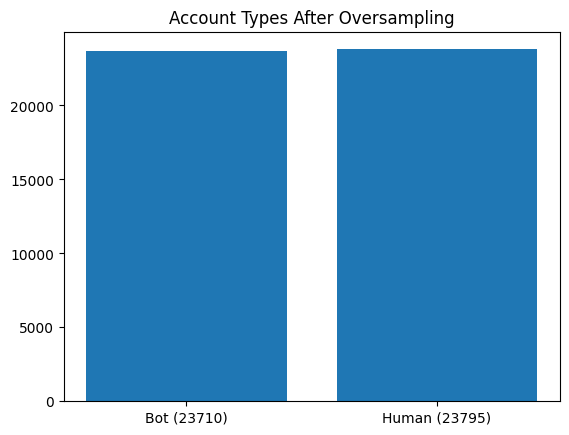

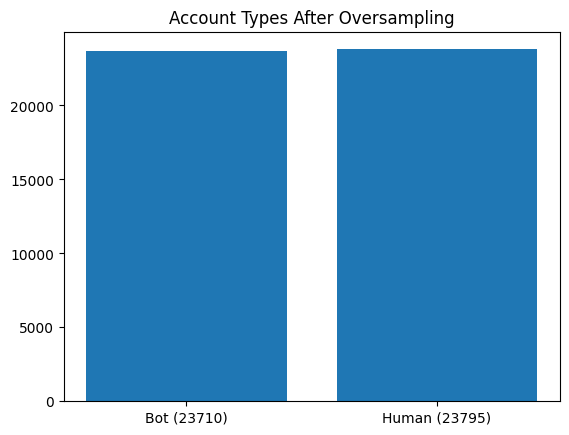

In [37]:
all_count = len(df)
bot_count = len(df[df["account_type"] == "bot"])

plt.bar(
    ["Bot (" + str(bot_count) + ')', "Human (" + str(all_count - bot_count) + ')'],
    [bot_count, all_count - bot_count]
)
plt.title("Account Types After Oversampling")
plt.show()

### Correlogram of Quantitative Data

In [38]:
cols_needed = ["followers_count", "account_age", "average_tweets_per_day", "average_tweets_liked_per_day"]
df_corr = df[cols_needed].corr(method = 'pearson', numeric_only = True)

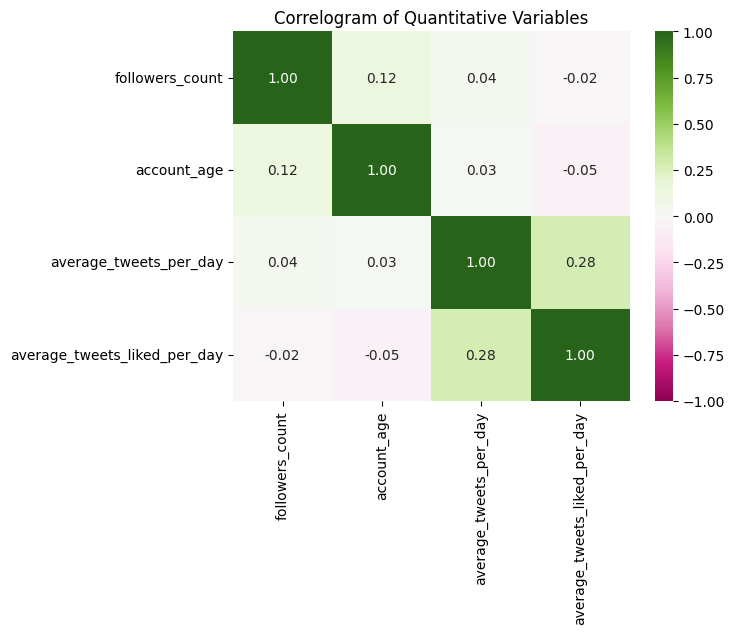

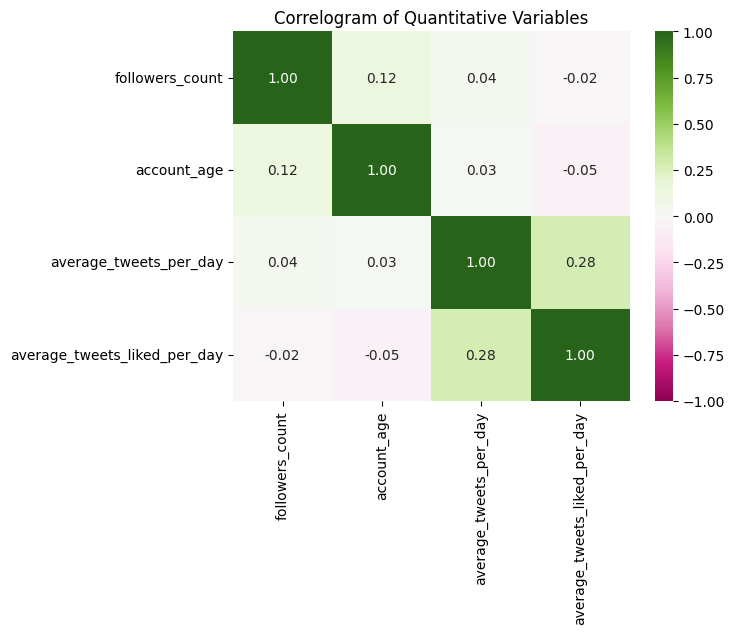

In [39]:
fig, ax = plt.subplots()
sns.heatmap(
    df_corr,
    vmin = -1,
    vmax = 1,
    xticklabels = df_corr.columns,
    yticklabels = df_corr.columns,
    annot = True,
    fmt = '.2f',
    cmap = "PiYG"
)
plt.title("Correlogram of Quantitative Variables")
plt.show()

None of the quantitative values are strongly correlated, so none of them will be removed.

### Comparisons

#### Descriptive Statistics

In [40]:
bots = df[df["account_type"] == "bot"]
humans = df[df["account_type"] == "human"]

In [41]:
bots.describe()

,id,followers_count,account_age,average_tweets_per_day,average_tweets_liked_per_day
count,2.371000e+04,2.371000e+04,23710.000000,23710.000000,23710.000000
mean,1.703154e+17,8.662852e+04,3510.374019,6.186677,1.545547
std,3.425769e+17,1.301911e+06,983.818404,32.177121,9.737887
min,3.097300e+04,0.000000e+00,1279.000000,0.000000,0.000000
25%,2.534008e+08,7.000000e+00,2683.000000,0.152385,0.041118
50%,8.448552e+08,2.500000e+01,3679.000000,0.598475,0.293804
75%,3.298365e+09,1.940000e+02,4267.000000,1.430572,0.585574
max,1.120974e+18,6.032388e+07,5808.000000,1225.271446,577.861282


,id,followers_count,account_age,average_tweets_per_day,average_tweets_liked_per_day
count,2.371000e+04,2.371000e+04,23710.000000,23710.000000,23710.000000
mean,1.703154e+17,8.662852e+04,3510.374019,6.186677,1.545547
std,3.425769e+17,1.301911e+06,983.818404,32.177121,9.737887
min,3.097300e+04,0.000000e+00,1279.000000,0.000000,0.000000
25%,2.534008e+08,7.000000e+00,2683.000000,0.152385,0.041118
50%,8.448552e+08,2.500000e+01,3679.000000,0.598475,0.293804
75%,3.298365e+09,1.940000e+02,4267.000000,1.430572,0.585574
max,1.120974e+18,6.032388e+07,5808.000000,1225.271446,577.861282


In [42]:
humans.describe()

,id,followers_count,account_age,average_tweets_per_day,average_tweets_liked_per_day
count,2.379500e+04,2.379500e+04,23795.000000,23795.000000,23795.000000
mean,9.690718e+16,5.564273e+05,3987.876529,5.928899,5.848961
std,2.722587e+17,3.054546e+06,991.076000,13.008997,14.702966
min,4.180000e+02,0.000000e+00,1403.000000,0.000000,0.000000
25%,6.067731e+07,1.940000e+02,3366.500000,0.587492,0.195866
50%,2.808848e+08,1.157000e+03,4213.000000,2.096271,1.130030
75%,1.640637e+09,8.688550e+04,4837.000000,6.062228,5.027646
max,1.076120e+18,1.335201e+08,5955.000000,576.039670,418.322822


,id,followers_count,account_age,average_tweets_per_day,average_tweets_liked_per_day
count,2.379500e+04,2.379500e+04,23795.000000,23795.000000,23795.000000
mean,9.690718e+16,5.564273e+05,3987.876529,5.928899,5.848961
std,2.722587e+17,3.054546e+06,991.076000,13.008997,14.702966
min,4.180000e+02,0.000000e+00,1403.000000,0.000000,0.000000
25%,6.067731e+07,1.940000e+02,3366.500000,0.587492,0.195866
50%,2.808848e+08,1.157000e+03,4213.000000,2.096271,1.130030
75%,1.640637e+09,8.688550e+04,4837.000000,6.062228,5.027646
max,1.076120e+18,1.335201e+08,5955.000000,576.039670,418.322822


#### Followers

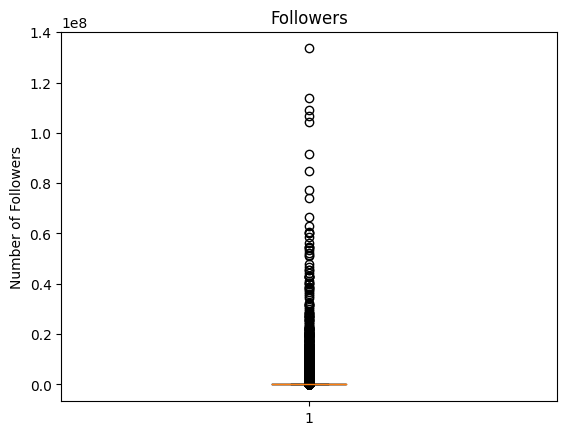

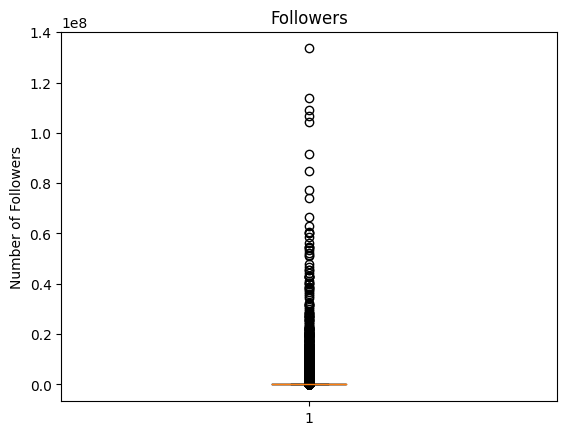

In [43]:
plt.boxplot(df["followers_count"])
plt.title("Followers")
plt.ylabel("Number of Followers")
plt.show()

In [44]:
df["followers_count"].describe()

count    4.750500e+04
mean     3.219482e+05
std      2.361039e+06
min      0.000000e+00
25%      1.800000e+01
50%      1.940000e+02
75%      3.126000e+03
max      1.335201e+08
Name: followers_count, dtype: float64

count    4.750500e+04
mean     3.219482e+05
std      2.361039e+06
min      0.000000e+00
25%      1.800000e+01
50%      1.940000e+02
75%      3.126000e+03
max      1.335201e+08
Name: followers_count, dtype: float64

There are many outliers in the number of followers.

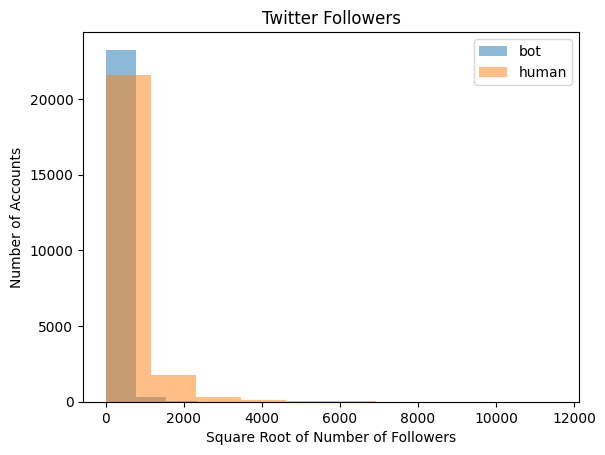

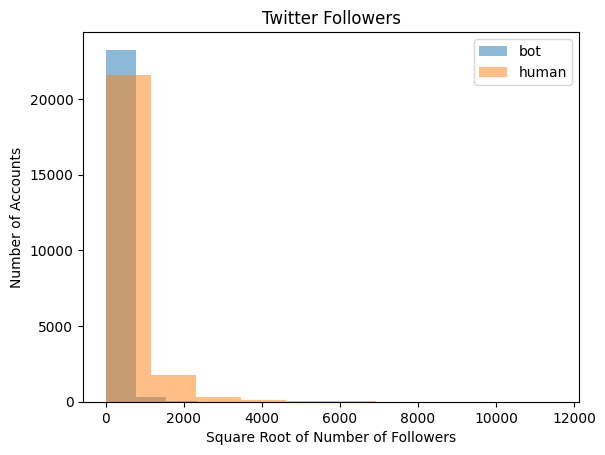

In [45]:
plt.hist(np.sqrt(df[df["account_type"] == "bot"]["followers_count"]), 10, alpha=0.5, label="bot")
plt.hist(np.sqrt(df[df["account_type"] == "human"]["followers_count"]), 10, alpha=0.5, label="human")
plt.title("Twitter Followers")
plt.xlabel("Square Root of Number of Followers")
plt.ylabel("Number of Accounts")
plt.legend(loc='upper right')
plt.show()

In [46]:
df[df["followers_count"] > 10000]["account_type"].value_counts()

human    8146
bot      1710
Name: account_type, dtype: int64

human    8146
bot      1710
Name: account_type, dtype: int64

The mean number of followers is approximately `400201.1`, but the median is only `382.5`. This finding means that most accounts have a low number of followers. However, some accounts have a great amount of followers. If data scientists in the future want to create bots for classifying Twitter accounts, they may opt to collect accounts with more followers.

Accounts with more than 10000 followers are more likely to be human.

#### Account Age

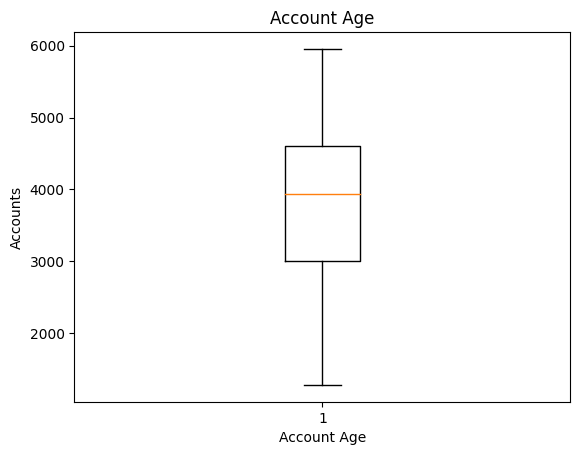

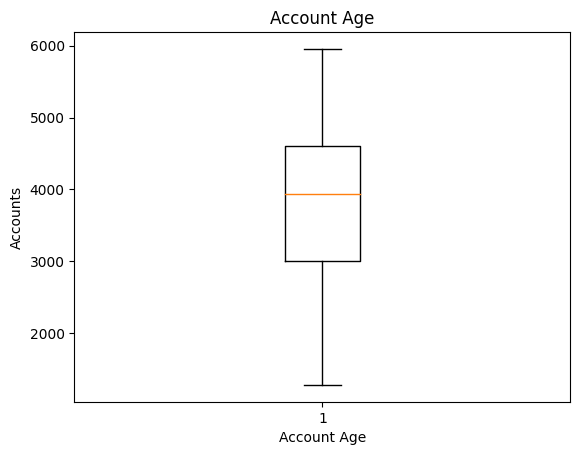

In [47]:
plt.boxplot(df["account_age"])
plt.title("Account Age")
plt.xlabel("Account Age")
plt.ylabel("Accounts")
plt.show()

The account age has no outliers.

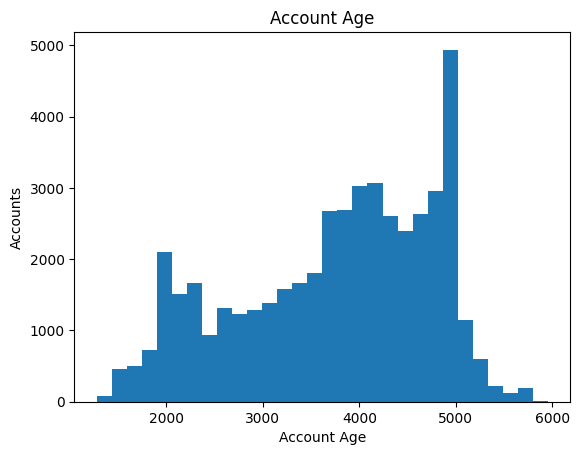

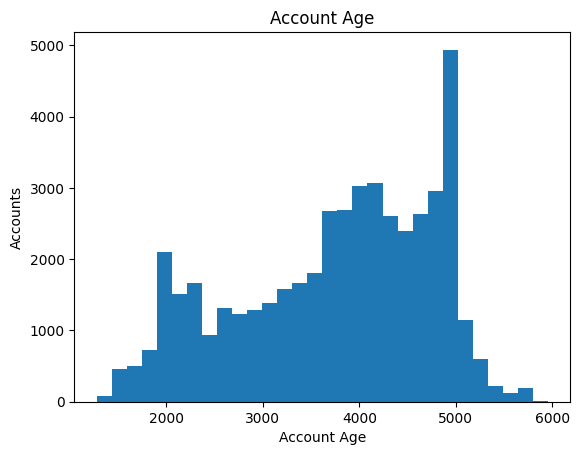

In [48]:
plt.hist(df["account_age"], bins=30)
plt.title("Account Age")
plt.xlabel("Account Age")
plt.ylabel("Accounts")
plt.show()

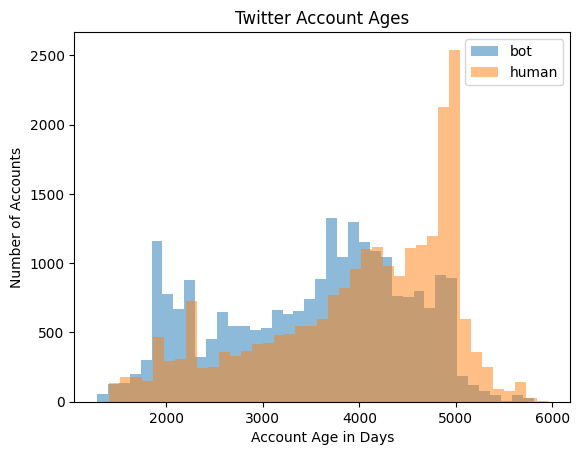

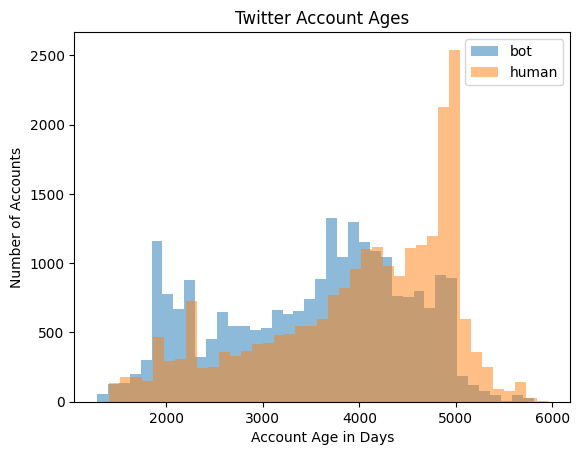

In [49]:
plt.hist(df[df["account_type"] == "bot"]["account_age"], 40, alpha=0.5, label="bot")
plt.hist(df[df["account_type"] == "human"]["account_age"], 40, alpha=0.5, label="human")
plt.title("Twitter Account Ages")
plt.xlabel("Account Age in Days")
plt.ylabel("Number of Accounts")
plt.legend(loc='upper right')
plt.show()

In [50]:
df[df["account_age"] > 4000]["account_type"].value_counts()

human    13914
bot       8562
Name: account_type, dtype: int64

human    13914
bot       8562
Name: account_type, dtype: int64

Many of the accounts in this dataset are old. Future data scientists who make bot detection algorithms can use newer accounts in their data.

Accounts older than 4000 days are more likely to be owned by humans.

#### Average Tweets per Day

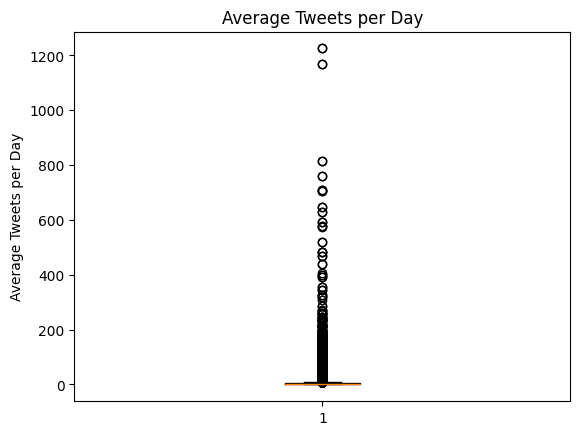

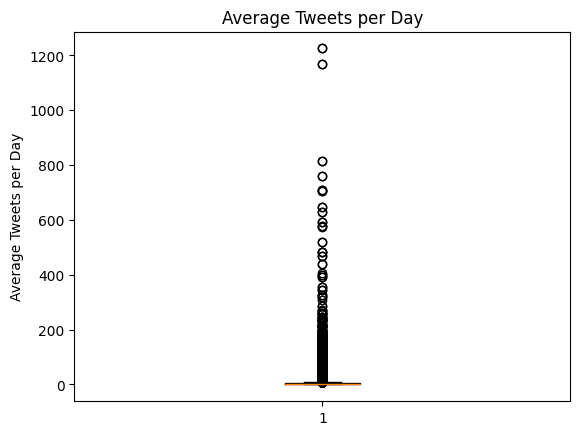

In [51]:
plt.boxplot(df["average_tweets_per_day"])
plt.title("Average Tweets per Day")
plt.ylabel("Average Tweets per Day")
plt.show()

In [52]:
df["average_tweets_per_day"].describe()

count    47505.000000
mean         6.057557
std         24.526100
min          0.000000
25%          0.313808
50%          0.922841
75%          3.989135
max       1225.271446
Name: average_tweets_per_day, dtype: float64

count    47505.000000
mean         6.057557
std         24.526100
min          0.000000
25%          0.313808
50%          0.922841
75%          3.989135
max       1225.271446
Name: average_tweets_per_day, dtype: float64

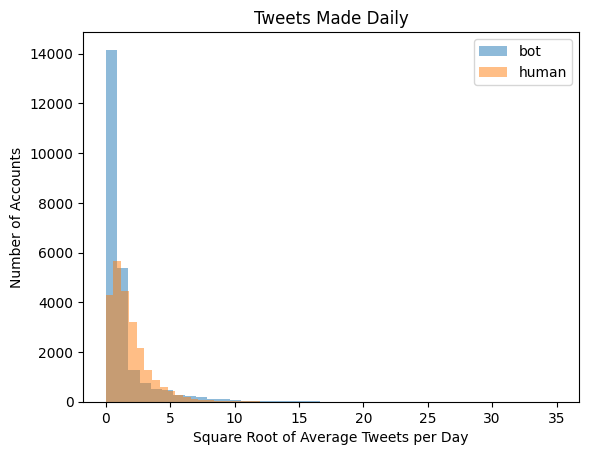

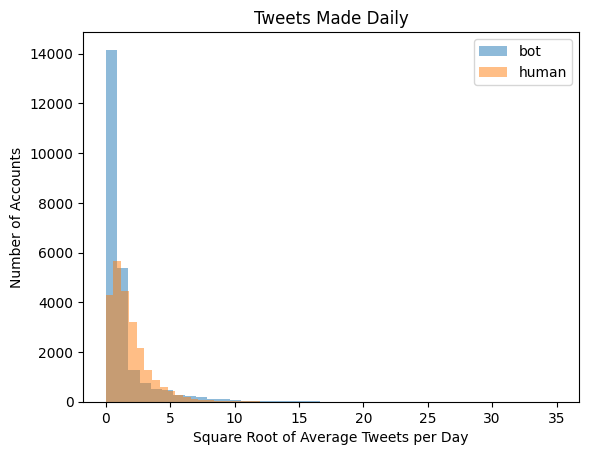

In [53]:
plt.hist(np.sqrt(df[df["account_type"] == "bot"]["average_tweets_per_day"]), 40, alpha=0.5, label="bot")
plt.hist(np.sqrt(df[df["account_type"] == "human"]["average_tweets_per_day"]), 40, alpha=0.5, label="human")
plt.title("Tweets Made Daily")
plt.xlabel("Square Root of Average Tweets per Day")
plt.ylabel("Number of Accounts")
plt.legend(loc='upper right')
plt.show()

In [54]:
df[df["average_tweets_per_day"] > 25]["account_type"].value_counts()

bot      1276
human    1151
Name: account_type, dtype: int64

bot      1276
human    1151
Name: account_type, dtype: int64

Most accounts tweet between 0 to 4 times per day. Accounts that tweet often are more likely to be bots. However, the same cannot be concluded for those that rarely tweet because the bots may have simply become inactive.

#### Average Tweets Liked per Day

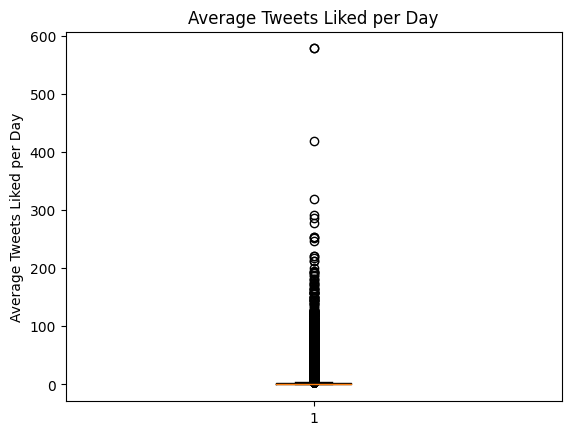

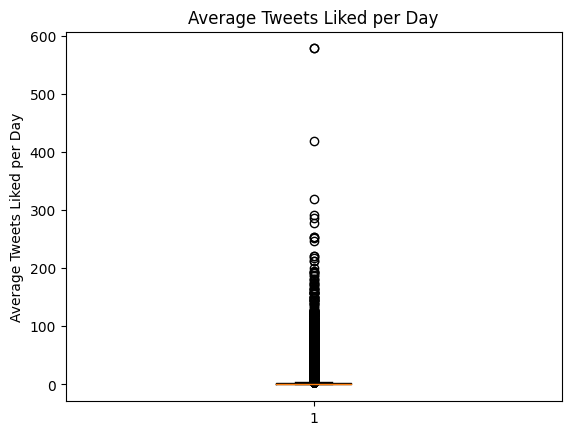

In [55]:
plt.boxplot(df["average_tweets_liked_per_day"])
plt.title("Average Tweets Liked per Day")
plt.ylabel("Average Tweets Liked per Day")
plt.show()

In [56]:
df["average_tweets_liked_per_day"].describe()

count    47505.000000
mean         3.701104
std         12.658477
min          0.000000
25%          0.081287
50%          0.473797
75%          1.882437
max        577.861282
Name: average_tweets_liked_per_day, dtype: float64

count    47505.000000
mean         3.701104
std         12.658477
min          0.000000
25%          0.081287
50%          0.473797
75%          1.882437
max        577.861282
Name: average_tweets_liked_per_day, dtype: float64

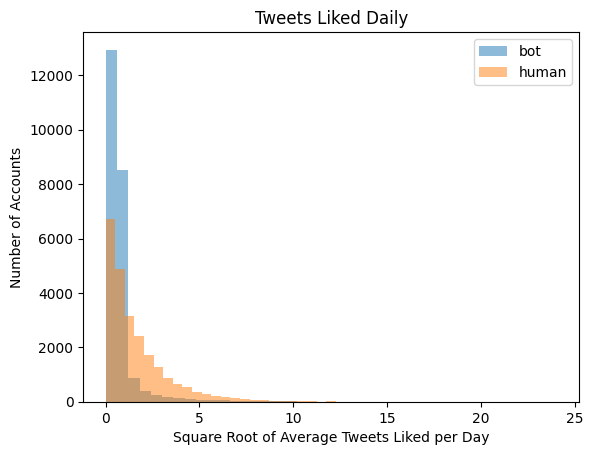

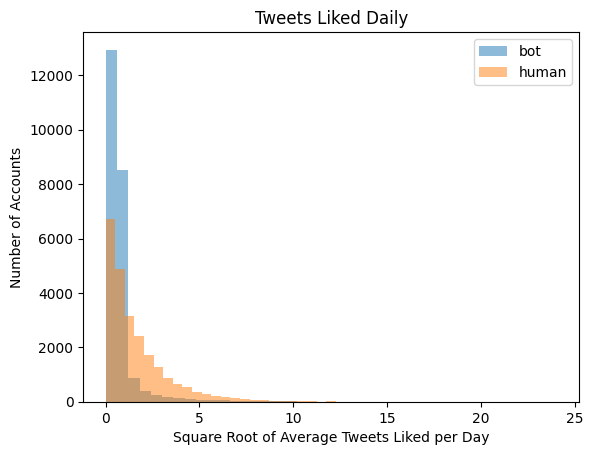

In [57]:
plt.hist(np.sqrt(df[df["account_type"] == "bot"]["average_tweets_liked_per_day"]), 40, alpha=0.5, label="bot")
plt.hist(np.sqrt(df[df["account_type"] == "human"]["average_tweets_liked_per_day"]), 40, alpha=0.5, label="human")
plt.title("Tweets Liked Daily")
plt.xlabel("Square Root of Average Tweets Liked per Day")
plt.ylabel("Number of Accounts")
plt.legend(loc='upper right')
plt.show()

In [58]:
df[df["average_tweets_liked_per_day"] < 5]["account_type"].value_counts()

bot      22650
human    17825
Name: account_type, dtype: int64

bot      22650
human    17825
Name: account_type, dtype: int64

Most accounts like 0 to 2 tweets per day. However, the average number of tweets liked per day is ` 3.701104`.

Based on this finding, bots are likely to like tweets than humans.

## Recap of Trends

The table below summarizes the insights from the data above.

<table>
    <thead>
        <tr>
            <th>Property</th>
            <th>Bot</th>
            <th>Human</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>Followers</b></td>
            <td>Less</td>
            <td>More</td>
        </tr>
        <tr>
            <td><b>Account Age</b></td>
            <td>Younger</td>
            <td>Older</td>
        </tr>
        <tr>
            <td><b>Tweets Liked Daily</b></td>
            <td>Less</td>
            <td>More</td>
        </tr>
    </tbody>
</table>